# Beefed-up clf version2 RF 


interestingly it picked amna for the top 2 photos and some of the other choices are bit more sensible but still can't be too sure on RF probabilities, deosn't provide the precision needed


In [1]:
from PIL import Image
import hdbscan
import time
import seaborn as sns
import pickle
import numpy as np
import pandas as pd
from umap import UMAP
from image_helpers import *
from tsne import image_scatter_plot
from sklearn.linear_model import LogisticRegression


import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
sns.set_context("poster")
%pylab inline

import warnings
warnings.filterwarnings('ignore')
pylab.rcParams['figure.figsize'] = (15, 15)

Populating the interactive namespace from numpy and matplotlib


In [2]:
data, paths, encodings, arrays_rescaled, X = load_encodings('../data/friends_and_myself_pics_faces_encodings.pickle')


In [3]:
!ls *.pickle

knn_tinderlikes3.pickle  lr_tinderlikes2.pickle   rf_tinderlikes2.pickle
knn_tinderlikes4.pickle  lr_tinderlikes3.pickle   rf_tinderlikes3.pickle
lr_tinderlikes.pickle    rf_cv_tinderlikes.pickle


In [4]:
lr = pickle.load(open('lr_tinderlikes3.pickle','rb'))
lr

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

count    49.000000
mean      0.634105
std       0.224841
min       0.168130
25%       0.499785
50%       0.681200
75%       0.817264
max       0.955310
dtype: float64
skew --  -0.5028243910799506
kurtosis -- -0.8104881310858243


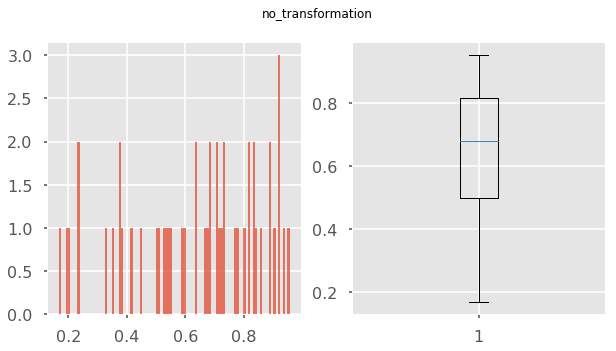

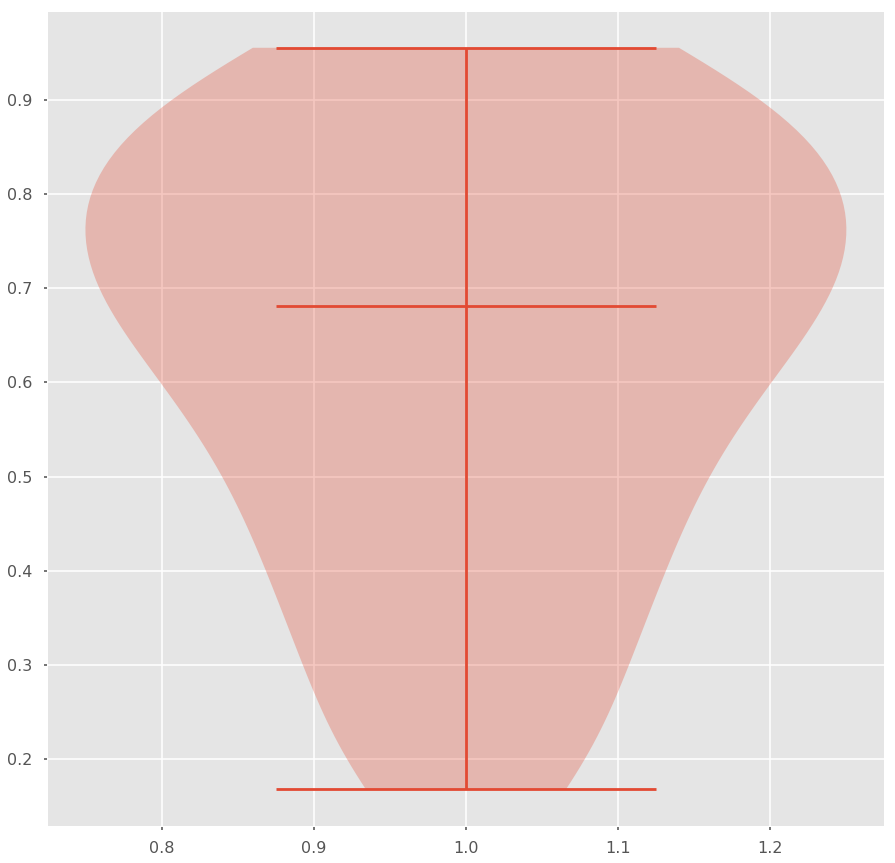

In [5]:

probas = pd.Series(lr.predict_proba(encodings)[:,1])
plot_distribution(probas)

In [6]:
num_of_bins = 5
sorted_imgs = sorted(zip(probas, arrays_rescaled), key=lambda x: x[0], reverse=True)
sorted_arrays_rescaled  = [img[1] for img in sorted_imgs]
sorted_probas = [img[0] for img in sorted_imgs]

bin_bounds = list(map(lambda x: x/100, list(range(0,100, int(100/num_of_bins)))))
bin_labels = pd.cut(sorted_probas, bins=bin_bounds, labels=list(range(1, num_of_bins )))


1
2


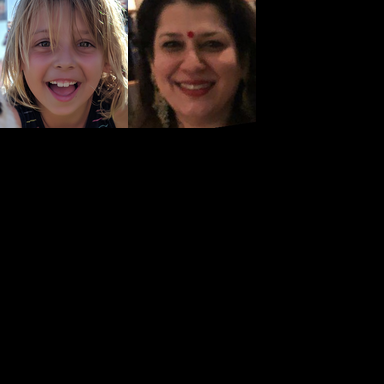

2
8


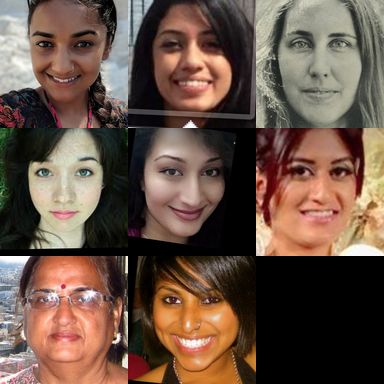

3
9


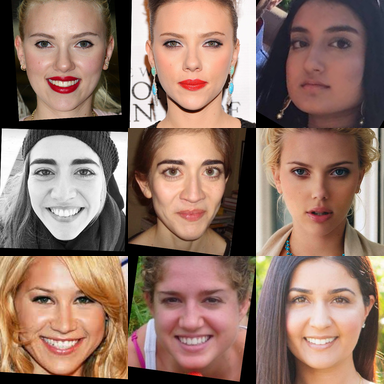

4
15


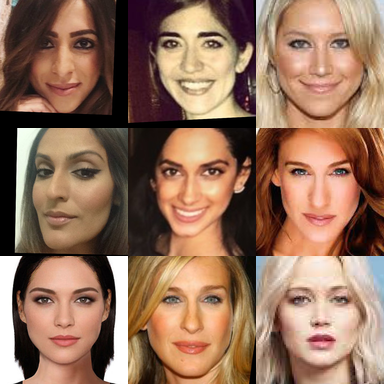

In [7]:
from image_helpers import _square_sizer

for cluster_idx in range(1, num_of_bins):
    print(cluster_idx)
    args = np.where(bin_labels== cluster_idx)[0]
    print(len(args))
    display(
        montagify([np.array(sorted_arrays_rescaled[arg]) for arg in args],
        (128,128), 
        tiles=(3,3)
    ))
    


1
2


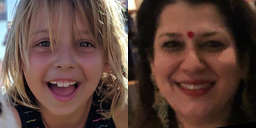

2
8


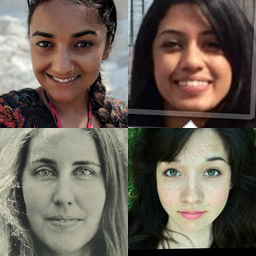

3
9


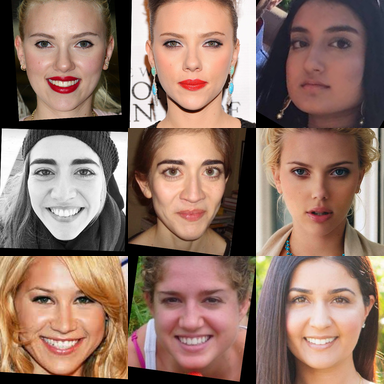

4
15


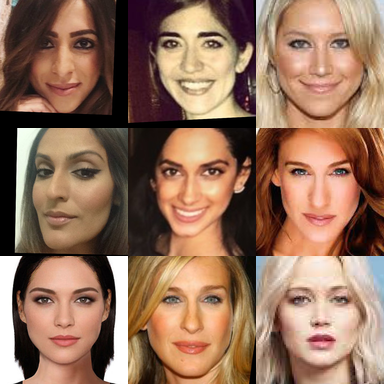

In [8]:

for cluster_idx in range(1, num_of_bins):
    print(cluster_idx)
    args = np.where(bin_labels== cluster_idx)[0]
    print(len(args))
    display(
        montagify([np.array(sorted_arrays_rescaled[arg]) for arg in args],
        (128,128), 
        tiles=_square_sizer(len(args))
    ))
    


# Individual rankings
scarlett johansen photo which scored very highly (but the rest of her photos tanked) One of amna also scored very highly but the other one was mundane.


The b/w photos seemed to have ranked much lower... try including only colored photos of people


0.9553098739868019


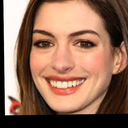

0.9320207905851994


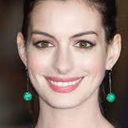

0.921027482677268


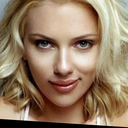

0.9186964335937964


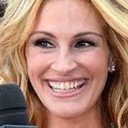

0.9162149805161793


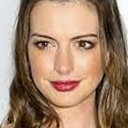

0.9014831433903103


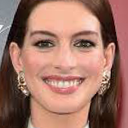

0.8909312883788827


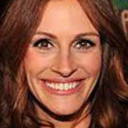

0.8846318289316001


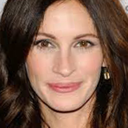

0.8577181150249981


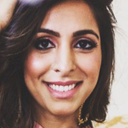

0.8448949732616744


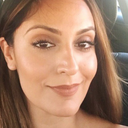

0.8336074134682114


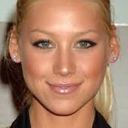

0.8301816781470133


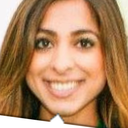

0.8172635168196242


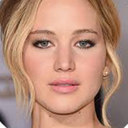

0.8139354107791081


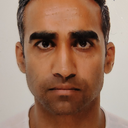

0.8055780280028533


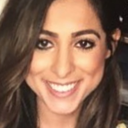

0.7784116522112243


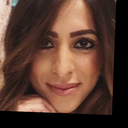

0.7668547668505825


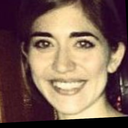

0.7348814220974712


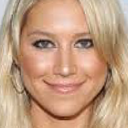

0.732390531923237


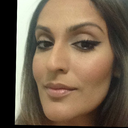

0.7238947720376987


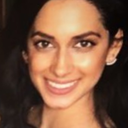

0.7163993227637571


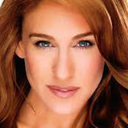

0.7105058081666984


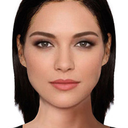

0.7087233163921326


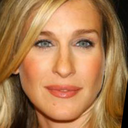

0.6868272839817291


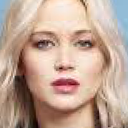

0.6811999990013528


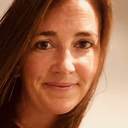

0.6796161226233307


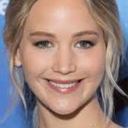

0.6699533455687463


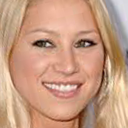

0.6397956392242542


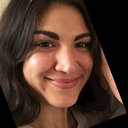

0.6333037871233881


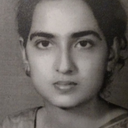

0.6001055096223376


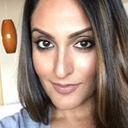

0.5909325101291163


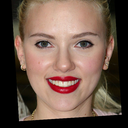

0.5499792491681791


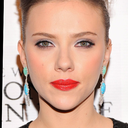

0.5442316163595643


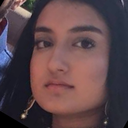

0.5358051144217117


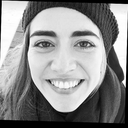

0.5247020146559928


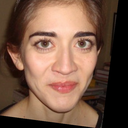

0.5110703065891886


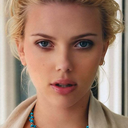

0.49978468584943125


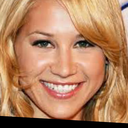

0.4484963288815628


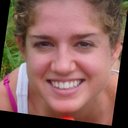

0.41930122183099305


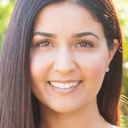

0.38217138864801975


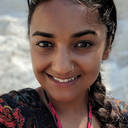

0.377486757900425


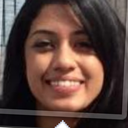

0.37416197944596136


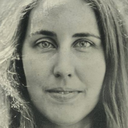

0.3535693728905686


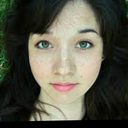

0.33243550919178


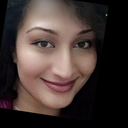

0.23693929343891884


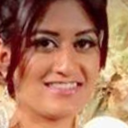

0.23392405467794444


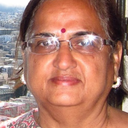

0.20340820676844898


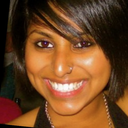

0.19824632828119626


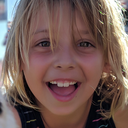

0.16812951161400994


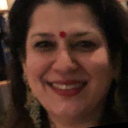

In [9]:
for idx in range(len(sorted_arrays_rescaled)):
    print(sorted_probas[idx])
    display(sorted_arrays_rescaled[idx])
    